In [22]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# matplotlib and seaborn for plotting
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go


import optuna
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
# from imblearn.combine import SMOTETomek
import joblib


# Spark Streaming
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, sum as spark_sum
from pyspark.sql.types import FloatType, IntegerType, StringType
from pyspark.sql.functions import regexp_replace
import webbrowser
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from copy import copy
from pyspark.ml.linalg import Vectors

In [16]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [17]:
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
# EXPLORATORY DATA ANALYSIS
# check dataframe TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
def check_df(dataframe, head=10):
    print('#'*20, 'Head', '#'*20)
    display(dataframe.head(head))
    print('#'*20, 'Shape', '#'*20)
    print(dataframe.shape)
    print('#'*20, 'Data Info', '#'*20)
    print(dataframe.info())
    print('#'*20, 'Data Types', '#'*20)
    print(dataframe.dtypes)
    print('#'*20, 'Missing Values', '#'*20)
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print('#'*20, 'Descriptive Statistics', '#'*20)
    display(dataframe.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    
check_df(df)

#################### Head ####################


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#################### Shape ####################
(7043, 21)
#################### Data Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 no

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.00,2.00,9.0,29.00,55.00,69.0,72.0,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.65,20.05,35.5,70.35,89.85,102.6,107.4,114.729,118.75


In [19]:
# categorical, numerical and cardinal variables
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1



GENDER Summary:
        Count  Percentage
gender                   
Male     3555    50.47565
Female   3488    49.52435


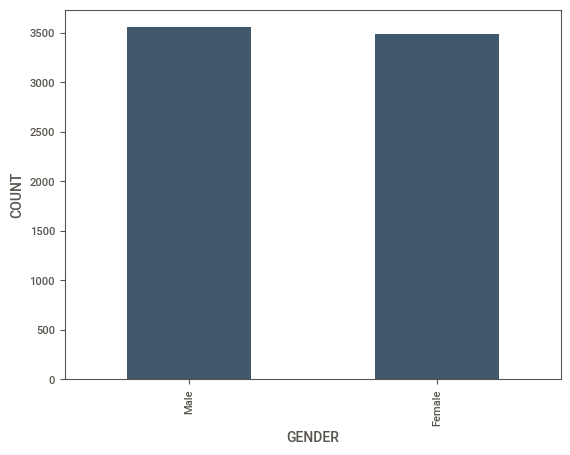


PARTNER Summary:
         Count  Percentage
Partner                   
No        3641    51.69672
Yes       3402    48.30328


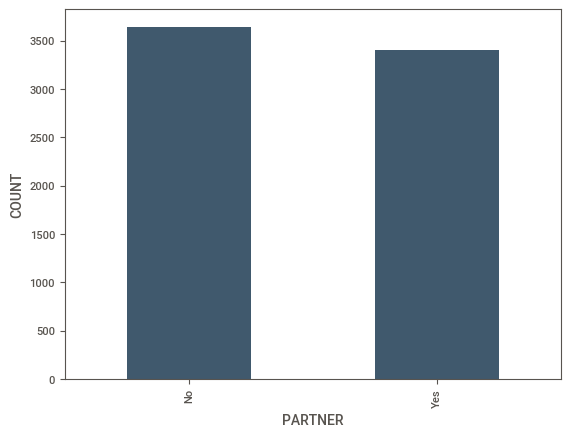


DEPENDENTS Summary:
            Count  Percentage
Dependents                   
No           4933   70.041176
Yes          2110   29.958824


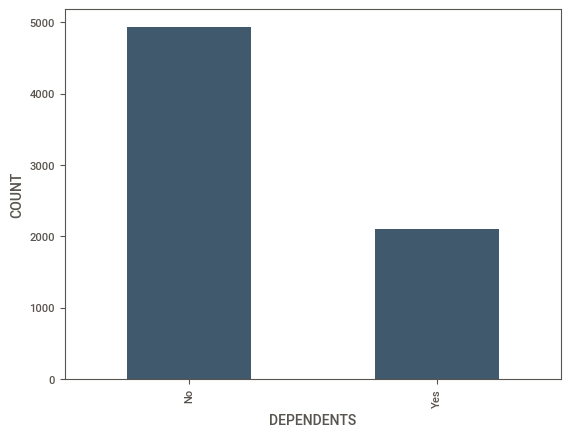


PHONESERVICE Summary:
              Count  Percentage
PhoneService                   
Yes            6361   90.316626
No              682    9.683374


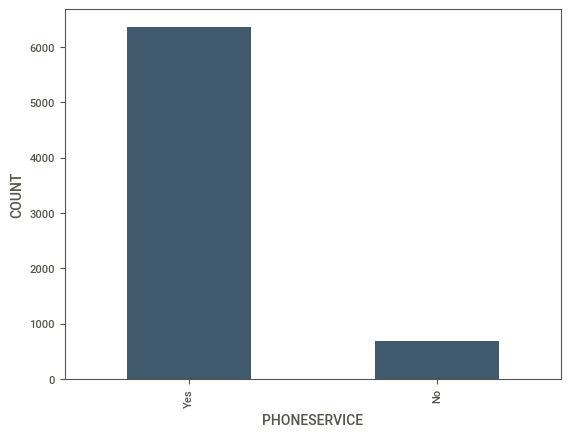


MULTIPLELINES Summary:
                  Count  Percentage
MultipleLines                      
No                 3390   48.132898
Yes                2971   42.183729
No phone service    682    9.683374


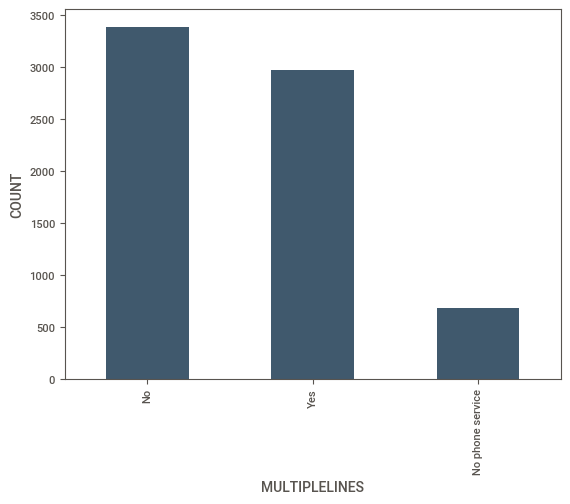


INTERNETSERVICE Summary:
                 Count  Percentage
InternetService                   
Fiber optic       3096   43.958540
DSL               2421   34.374556
No                1526   21.666903


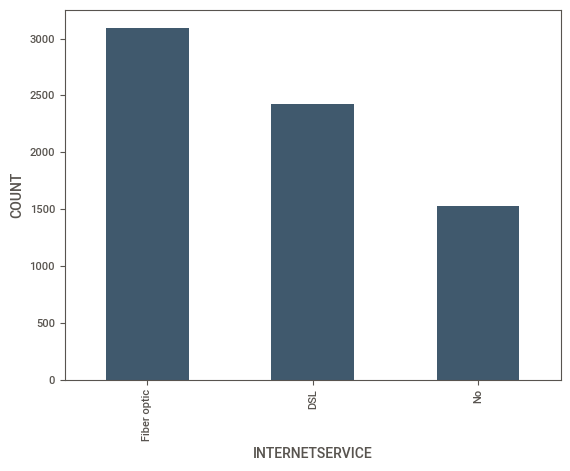


ONLINESECURITY Summary:
                     Count  Percentage
OnlineSecurity                        
No                    3498   49.666335
Yes                   2019   28.666761
No internet service   1526   21.666903


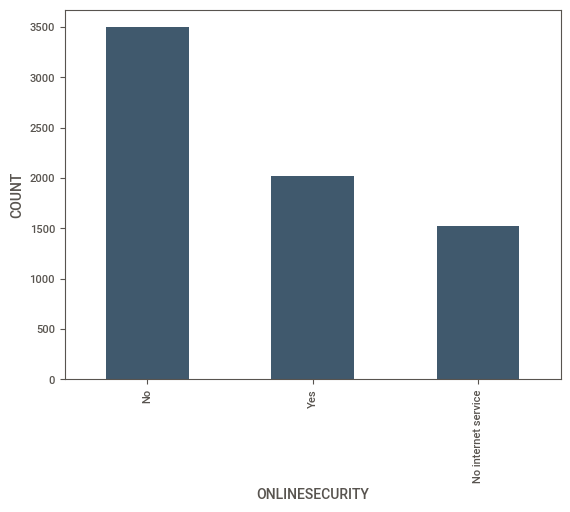


ONLINEBACKUP Summary:
                     Count  Percentage
OnlineBackup                          
No                    3088   43.844952
Yes                   2429   34.488144
No internet service   1526   21.666903


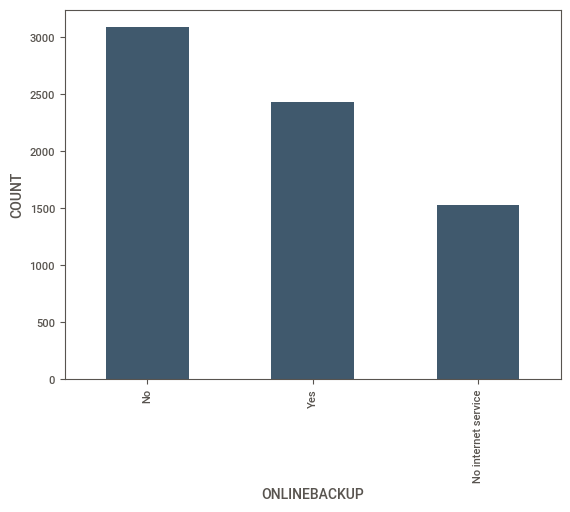


DEVICEPROTECTION Summary:
                     Count  Percentage
DeviceProtection                      
No                    3095   43.944342
Yes                   2422   34.388755
No internet service   1526   21.666903


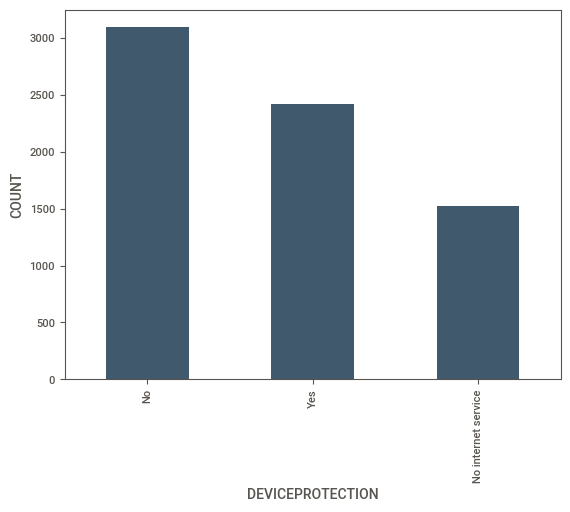


TECHSUPPORT Summary:
                     Count  Percentage
TechSupport                           
No                    3473   49.311373
Yes                   2044   29.021724
No internet service   1526   21.666903


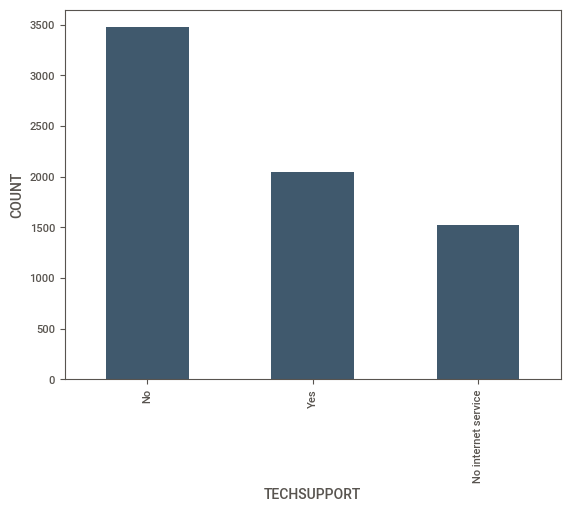


STREAMINGTV Summary:
                     Count  Percentage
StreamingTV                           
No                    2810   39.897771
Yes                   2707   38.435326
No internet service   1526   21.666903


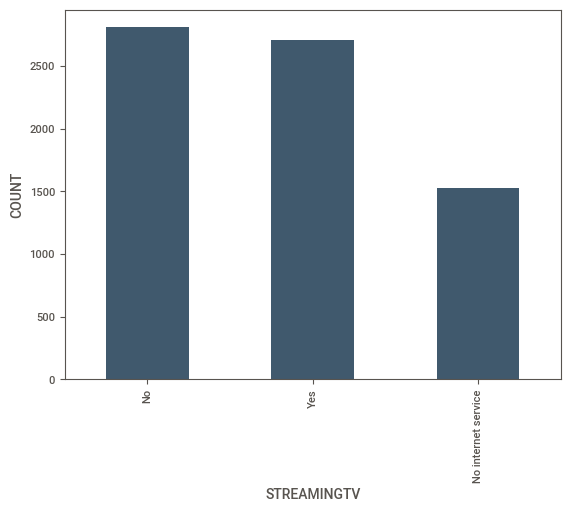


STREAMINGMOVIES Summary:
                     Count  Percentage
StreamingMovies                       
No                    2785   39.542808
Yes                   2732   38.790288
No internet service   1526   21.666903


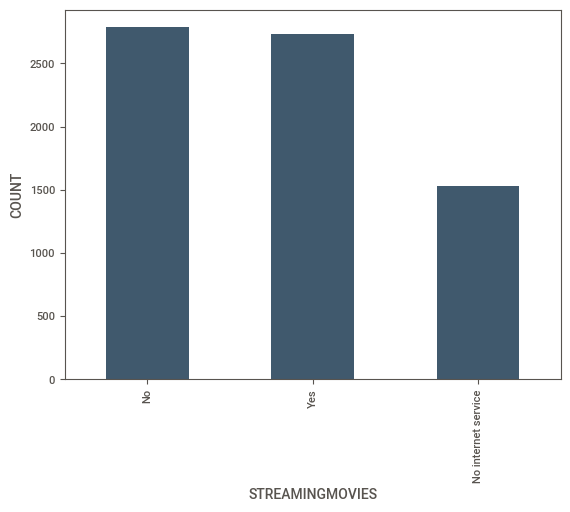


CONTRACT Summary:
                Count  Percentage
Contract                         
Month-to-month   3875   55.019168
Two year         1695   24.066449
One year         1473   20.914383


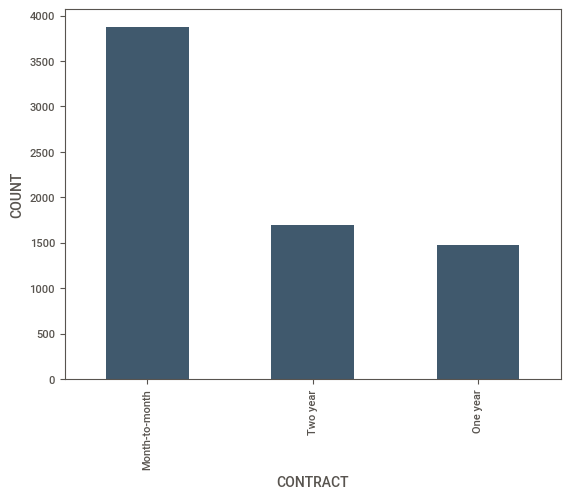


PAPERLESSBILLING Summary:
                  Count  Percentage
PaperlessBilling                   
Yes                4171   59.221922
No                 2872   40.778078


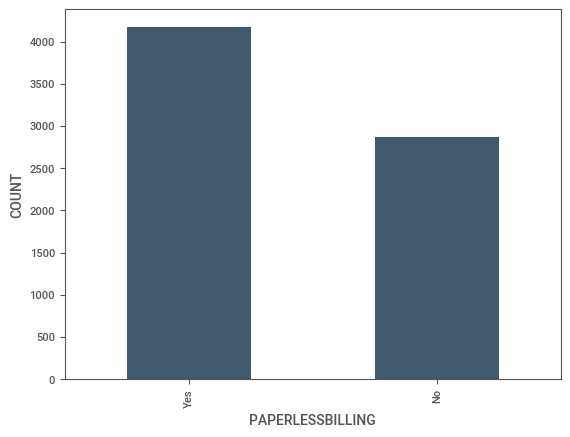


PAYMENTMETHOD Summary:
                           Count  Percentage
PaymentMethod                               
Electronic check            2365   33.579441
Mailed check                1612   22.887974
Bank transfer (automatic)   1544   21.922476
Credit card (automatic)     1522   21.610109


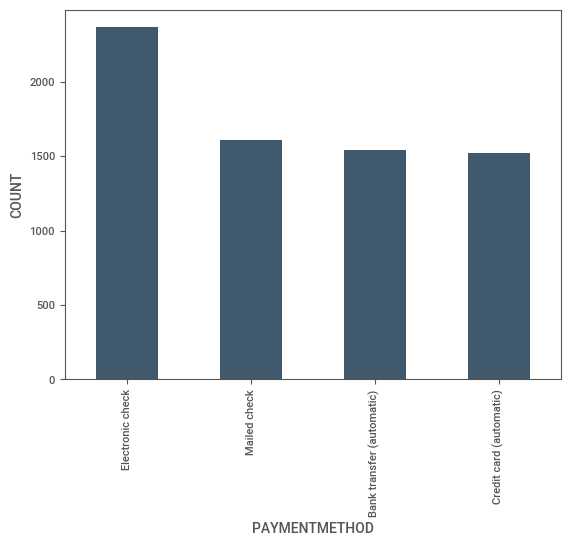


CHURN Summary:
       Count  Percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


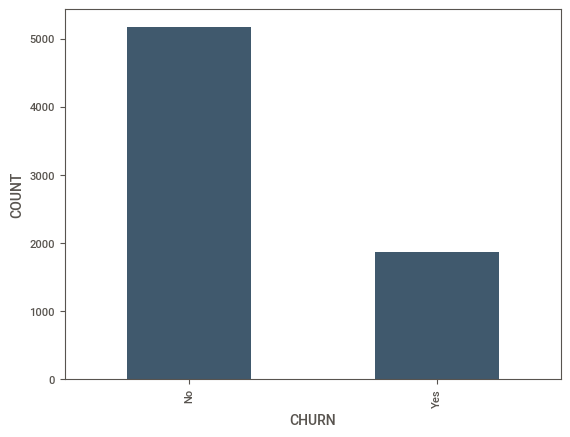


SENIORCITIZEN Summary:
               Count  Percentage
SeniorCitizen                   
0               5901   83.785319
1               1142   16.214681


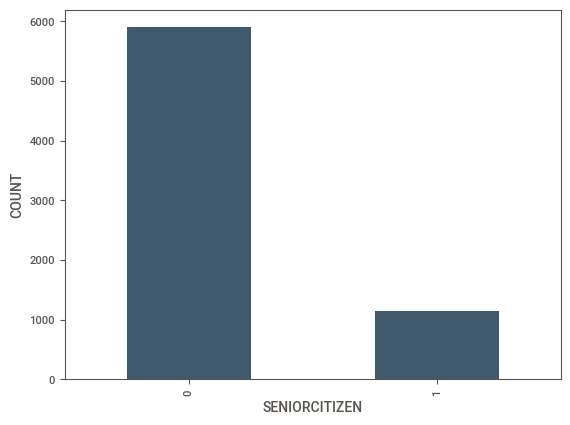

In [21]:
# summary of categorical variables
def cat_summary(dataframe, col_name, plot=False):
    print(f'\n{col_name.upper()} Summary:')
    counts = dataframe[col_name].value_counts()
    percentages = counts / len(dataframe) * 100
    print(pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage']))

    if plot:
        dataframe[col_name].value_counts().plot(kind='bar', rot=90, color='#40596D')
        plt.xlabel(col_name.upper())
        plt.ylabel('COUNT')
        plt.show()
        
for col in cat_cols:
    cat_summary(df, col, plot=True)

# Outlier Analysis

In [23]:
# finding outlier thresholds
def outlier_thresholds(dataframe, col_name, lower_quantile=0.05, upper_quantile=0.95):
    lower_quartile = dataframe[col_name].quantile(lower_quantile)
    upper_quartile = dataframe[col_name].quantile(upper_quantile)
    iqr = upper_quartile - lower_quartile
    upper_limit = round(upper_quartile + 1.5 * iqr, 2)
    lower_limit = round(lower_quartile - 1.5 * iqr, 2)
    return lower_limit, upper_limit
# removing outliers
def remove_outliers(dataframe, column_name, lower_quantile=0.05, upper_quantile=0.95):
    lower_quartile = dataframe[column_name].quantile(lower_quantile)
    upper_quartile = dataframe[column_name].quantile(upper_quantile)
    iqr = upper_quartile - lower_quartile
    upper_limit = round(upper_quartile + 1.5 * iqr, 2)
    lower_limit = round(lower_quartile - 1.5 * iqr, 2)
    dataframe = dataframe[~((dataframe[column_name] < lower_limit) | (dataframe[column_name] > upper_limit))]
    return dataframe

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        print ("there is outlier")
    else:
         print ("there is no outlier")

for col in num_cols:
    check_outlier(df, col)

there is no outlier
there is no outlier


In [28]:
# missing values
def missing_values_table(dataframe, return_cols=True):
    missing_cols = dataframe.columns[dataframe.isnull().any()]
    missing_count = dataframe[missing_cols].isnull().sum().sort_values(ascending=False)
    missing_ratio = (missing_count / dataframe.shape[0]) * 100
    missing_data = pd.concat([missing_count, missing_ratio], axis=1, keys=['Missing Count', 'Missing Ratio (%)'])
    print(missing_data, end="\n")
    if return_cols:
        return missing_cols

na_columns = missing_values_table(df, return_cols=True)